In [1]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_selection import SelectKBest, chi2, f_classif

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [2]:
trainxy = pd.read_csv('/home/kshitij/Acads/MS4610 project/IDA project dataset/train_xy.csv')
trainx  = pd.read_csv('/home/kshitij/Acads/MS4610 project/IDA project dataset/train_x.csv')
trainy  = pd.read_csv('/home/kshitij/Acads/MS4610 project/IDA project dataset/train_y.csv')

trainxy.drop(['ID'],axis=1,inplace=True)
trainx.drop(['ID'],axis=1,inplace=True)
trainy.drop(['ID'],axis=1,inplace=True)

#Basic conversion of Categorical variables
trainxy["Loan type"] = trainxy["Loan type"].astype('category')
trainxy["Loan type"] = trainxy["Loan type"].cat.codes
trainxy.loc[(trainxy['Loan type']==-1),'Loan type']=np.NaN
trainxy=pd.get_dummies(trainxy, columns=["Occupation type"], prefix=["Occupation"])

#Imputing Age
trainxy.loc[(trainxy.Age.isna())&(trainxy.Score2>=194.9185),'Age']=1
trainxy.loc[(trainxy.Age.isna())&(trainxy.Score2<194.9185),'Age']=0

#Imputing Loan type
trainxy["Loan type"] = trainxy["Loan type"].astype('category')
trainxy["Loan type"] = trainxy["Loan type"].cat.codes
trainxy.loc[(trainxy['Loan type']==-1),'Loan type']=np.NaN
#trainxy.loc[(trainxy.Score2.notna())&(trainxy['Loan type'].isna())&(192.47<trainxy.Score2),'Loan type']=1
#trainxy.loc[(trainxy.Score2.notna())&(trainxy['Loan type'].isna())&(192.47>trainxy.Score2),'Loan type']=0

#Imputing Occupation type
#trainxy.loc[(trainxy.Score4.notna())&(trainxy.Occupation_X==0)&(trainxy.Occupation_Y==0)&(trainxy.Occupation_Z==0)&(602.81<trainxy.Score4),'Occupation_X']=1
#trainxy.loc[(trainxy.Score4.notna())&(trainxy.Occupation_X==0)&(trainxy.Occupation_Y==0)&(trainxy.Occupation_Z==0)&(598.71<trainxy.Score4)&(trainxy.Score4<602.38),'Occupation_Y']=1
#trainxy.loc[(trainxy.Score4.notna())&(trainxy.Occupation_X==0)&(trainxy.Occupation_Y==0)&(trainxy.Occupation_Z==0)&(trainxy.Score4<598.67),'Occupation_Z']=1

#Imputing Score4
#trainxy.loc[(trainxy.Score4.isna())&(trainxy.Occupation_X==1),'Score4']=trainxy.loc[(trainxy.Score4.isna())&(trainxy.Occupation_X==1)].Score4.median()
#trainxy.loc[(trainxy.Score4.isna())&(trainxy.Occupation_Y==1),'Score4']=trainxy.loc[(trainxy.Score4.isna())&(trainxy.Occupation_Y==1)].Score4.median()
#trainxy.loc[(trainxy.Score4.isna())&(trainxy.Occupation_Z==1),'Score4']=trainxy.loc[(trainxy.Score4.isna())&(trainxy.Occupation_Z==1)].Score4.median()

#Imputing Expense and Score5
trainxy.loc[(trainxy.Expense.isna())&(trainxy.Score5.notna()),'Expense']=trainxy.Score5*2.06976-5339.9
trainxy.loc[(trainxy.Expense.notna())&(trainxy.Score5.isna()),'Score5']=(trainxy.Expense+5339.9)/2.06976

#Imputing Score2 and Score4
trainxy.loc[(trainxy.Expense.isna())&(trainxy.Score5.notna()),'Expense']=trainxy.Score5*2.06976-5339.9
trainxy.loc[(trainxy.Expense.notna())&(trainxy.Score5.isna()),'Score5']=(trainxy.Expense+5339.9)/2.06976

#Imputing Score3 and the remaining Expense
#trainxy.loc[(trainxy.Expense.isna())&(trainxy.Score3.notna()),'Expense']=trainxy.Score3*11.3017+1628.15
#trainxy.loc[(trainxy.Expense.notna())&(trainxy.Score3.isna()),'Score3']=(trainxy.Expense-1628.15)/11.3017

#Imputing Score1 and the remaining Score4 
#trainxy.loc[(trainxy.Score4.isna())&(trainxy.Score1.notna()),'Score4']=trainxy.Score1*17.7343+597.066
#trainxy.loc[(trainxy.Score4.notna())&(trainxy.Score1.isna()),'Score1']=(trainxy.Score4-597.066)/17.7343

#Imputing Score2 and Income
#trainxy.loc[(trainxy.Income.isna())&(trainxy.Score2.notna()),'Income']=trainxy.Score2*20.9689+11613.7
#trainxy.loc[(trainxy.Income.notna())&(trainxy.Score2.isna()),'Score2']=(trainxy.Income-11613.7)/20.9689


#Dropping Score5 since it has perfect correlation w Expense
trainxy.drop(['Score5'],axis=1,inplace=True)

#Dropping the remaining Null values
trainxy.dropna(inplace=True)
trainx=trainxy.copy()
trainx.drop(['Label'],axis=1,inplace=True)

x_train, x_test, y_train, y_test = train_test_split(trainx, trainxy.Label, test_size = 0.2)  

SVC(kernel='linear')

SVC(kernel='poly')

SVC()

SVC(kernel='sigmoid')

Text(0.5, 0, 'kernels')

Text(0, 0.5, 'accuracy')

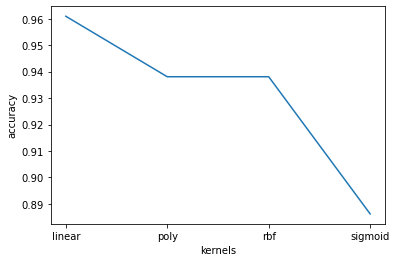

In [3]:
#Testing for SVMs with different Kernel types
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
acc_svm = []
for ker in kernels:
    model_svm = svm.SVC(kernel = ker)
    model_svm.fit(x_train, y_train)
    predictions_svm = model_svm.predict(x_test)
    acc_svm.append(accuracy_score(y_test, predictions_svm))
plt.plot(kernels, acc_svm)
plt.xlabel('kernels')
plt.ylabel('accuracy')

In [4]:
# Accuracy and f1 score for the linear (best) kernel
f1_sc_svm = f1_score(y_test, predictions_svm)
precision_svm = f1_score(y_test, predictions_svm)
print(f"The Accuracy of the SVM model is {acc_svm[0]} and the f1 score is {f1_sc_svm} and the precision score is {precision_svm}")

The Accuracy of the SVM model is 0.9609267472090534 and the f1 score is 0.01195219123505976 and the precision score is 0.01195219123505976


In [5]:
# Random Forests Classifier model
model_RFC = RFC(max_features = 'sqrt')
model_RFC.fit(x_train, y_train)
predictions_RFC = model_RFC.predict(x_test)
acc_RFC = accuracy_score(y_test, predictions_RFC)
f1_sc_RFC = f1_score(y_test, predictions_RFC)
precision_RFC = f1_score(y_test, predictions_RFC)
print(f"The Accuracy of the RFC model is {acc_RFC} and the f1 score is {f1_sc_RFC} and the precision score is {precision_RFC}")

RandomForestClassifier(max_features='sqrt')

The Accuracy of the RFC model is 0.9846306774736198 and the f1 score is 0.867501647989453 and the precision score is 0.867501647989453


In [6]:
# Logistic Regression model
model_LR = LogisticRegression(max_iter=300)
model_LR.fit(x_train, y_train)
predictions_LR = model_LR.predict(x_test)
acc_LR = accuracy_score(y_test, predictions_LR)
f1_sc_LR = f1_score(y_test, predictions_LR)
precision_LR = f1_score(y_test, predictions_LR)
print(f"The Accuracy of the Logistic Regression model is {acc_LR} and the f1 score is {f1_sc_LR} and the precision score is {precision_LR}")

LogisticRegression(max_iter=300)

The Accuracy of the Logistic Regression model is 0.9627618901972779 and the f1 score is 0.6069410815173527 and the precision score is 0.6069410815173527


In [7]:
# Linear Discriminant Analysis model
model_LDA = LDA()
model_LDA.fit(x_train, y_train)
predictions_LDA = model_LDA.predict(x_test)
acc_LDA = accuracy_score(y_test, predictions_LDA)
f1_sc_LDA = f1_score(y_test, predictions_LDA)
precision_LDA = f1_score(y_test, predictions_LDA)
print(f"The Accuracy of the LDA model is {acc_LDA} and the f1 score is {f1_sc_LDA} and the precision score is {precision_LDA}")

LinearDiscriminantAnalysis()

The Accuracy of the LDA model is 0.9613090686649335 and the f1 score is 0.6235119047619048 and the precision score is 0.6235119047619048


In [8]:
# Quadratic Discriminant Analysis model
model_QDA = QDA()
model_QDA.fit(x_train, y_train)
predictions_QDA = model_QDA.predict(x_test)
acc_QDA = accuracy_score(y_test, predictions_QDA)
f1_sc_QDA = f1_score(y_test, predictions_QDA)
precision_QDA = f1_score(y_test, predictions_QDA)
print(f"The Accuracy of the QDA model is {acc_QDA} and the f1 score is {f1_sc_QDA} and the precision score is {precision_QDA}")

QuadraticDiscriminantAnalysis()

The Accuracy of the QDA model is 0.9688025692001835 and the f1 score is 0.7381258023106547 and the precision score is 0.7381258023106547


In [9]:
# Boosting Classifier model
model_GBC = GBC()
model_GBC.fit(x_train, y_train)
predictions_GBC = model_GBC.predict(x_test)
acc_GBC = accuracy_score(y_test, predictions_GBC)
f1_sc_GBC = f1_score(y_test, predictions_GBC)
precision_GBC = f1_score(y_test, predictions_GBC)
print(f"The Accuracy of the GBC model is {acc_GBC} and the f1 score is {f1_sc_GBC} and the precision score is {precision_GBC}")

GradientBoostingClassifier()

The Accuracy of the GBC model is 0.9786664627618902 and the f1 score is 0.8087731322823852 and the precision score is 0.8087731322823852


In [10]:
model_XGB = xgb.XGBClassifier(random_state=0,n_estimators=1000,learning_rate=0.05,max_depth=6, tree_method='auto')
model_XGB.fit(x_train, y_train)
predictions_XGB= model_XGB.predict(x_test)
acc_XGB = accuracy_score(y_test, predictions_XGB)
f1_sc_XGB = f1_score(y_test, predictions_XGB)
precision_XGB = f1_score(y_test, predictions_XGB)
print(f"The Accuracy of the XGB model is {acc_XGB} and the f1 score is {f1_sc_XGB} and the precision score is {precision_XGB}")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='auto', validate_parameters=1, verbosity=None)

The Accuracy of the XGB model is 0.9865422847530203 and the f1 score is 0.8855656697009103 and the precision score is 0.8855656697009103


In [11]:
# Selecting the best out of the seven models
df_model = pd.DataFrame(['SVM','Random Forests','LDA','QDA','Boosting','Logistic Regression','XGBoost'])
df_accuracy = pd.DataFrame([acc_svm[0], acc_RFC, acc_LDA, acc_QDA, acc_GBC, acc_LR,acc_XGB])
df_precision = pd.DataFrame([precision_svm, precision_RFC, precision_LDA, precision_QDA, precision_GBC, precision_LR,precision_XGB])
df_f1_score = pd.DataFrame([f1_sc_svm, f1_sc_RFC, f1_sc_LDA, f1_sc_QDA, f1_sc_GBC, f1_sc_LR,f1_sc_XGB])
models = pd.concat([df_model,df_accuracy,df_precision,df_f1_score], axis=1)
models.columns = ['Models','Accuracy','Precision','f1 Score']
print(models)

                Models  Accuracy  Precision  f1 Score
0                  SVM  0.960927   0.011952  0.011952
1       Random Forests  0.984631   0.867502  0.867502
2                  LDA  0.961309   0.623512  0.623512
3                  QDA  0.968803   0.738126  0.738126
4             Boosting  0.978666   0.808773  0.808773
5  Logistic Regression  0.962762   0.606941  0.606941
6              XGBoost  0.986542   0.885566  0.885566


Text(0.5, 0, 'Models')

Text(0, 0.5, 'Accuracy')

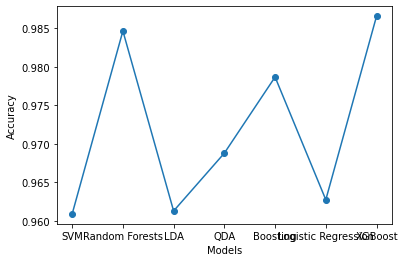

In [12]:
plt.plot(models['Models'], models['Accuracy'], 'o-')
plt.xlabel('Models')
plt.ylabel('Accuracy')

Text(0.5, 0, 'Models')

Text(0, 0.5, 'f1 score')

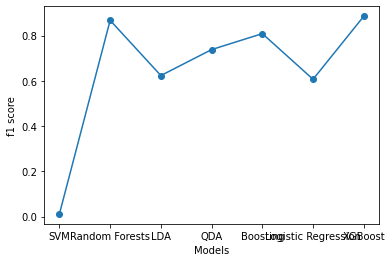

In [13]:
plt.plot(models['Models'], models['f1 Score'], 'o-')
plt.xlabel('Models')
plt.ylabel('f1 score')

Text(0.5, 0, 'Models')

Text(0, 0.5, 'Precision')

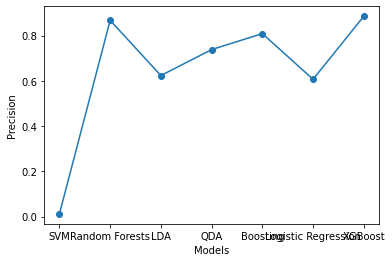

In [14]:
plt.plot(models['Models'], models['Precision'], 'o-')
plt.xlabel('Models')
plt.ylabel('Precision')

In [15]:
loan_modelm1 = xgb.XGBClassifier(random_state=0,n_estimators=1000,learning_rate=0.05,max_depth=6, tree_method='auto')
loan_modelm2 = xgb.XGBClassifier(random_state=0,n_estimators=1000,learning_rate=0.1, max_depth=6, tree_method='auto')
loan_modelm3 = xgb.XGBClassifier(random_state=0,n_estimators=1000,learning_rate=0.01, max_depth=6, tree_method='auto')
loan_modelm4 = xgb.XGBClassifier(random_state=0,n_estimators=5000,learning_rate=0.05, max_depth=6, tree_method='auto')
loan_modelm5 = xgb.XGBClassifier(random_state=0,n_estimators=500,learning_rate=0.05, max_depth=6, tree_method='auto')
loan_modelm6 = xgb.XGBClassifier(random_state=0,n_estimators=1000,learning_rate=0.05, max_depth=6, tree_method='auto')
loan_modelm7 = xgb.XGBClassifier(random_state=0,n_estimators=1000,learning_rate=0.05,max_depth=6, tree_method='auto')
loan_modelm8 = xgb.XGBClassifier(random_state=0,n_estimators=1000,learning_rate=0.05, max_depth=9, tree_method='auto')
loan_modelm9 = xgb.XGBClassifier(random_state=0,n_estimators=1000,learning_rate=0.05, max_depth=3, tree_method='auto')

In [16]:
crossm1=cross_val_score(estimator=loan_modelm1, X=trainx, y=trainxy.Label, error_score='raise',scoring='precision') 
crossm2=cross_val_score(estimator=loan_modelm2, X=trainx, y=trainxy.Label, error_score='raise',scoring='precision') 
crossm3=cross_val_score(estimator=loan_modelm3, X=trainx, y=trainxy.Label, error_score='raise',scoring='precision') 

In [17]:
crossm4=cross_val_score(estimator=loan_modelm4, X=trainx, y=trainxy.Label, error_score='raise',scoring='precision') 
crossm5=cross_val_score(estimator=loan_modelm5, X=trainx, y=trainxy.Label, error_score='raise',scoring='precision')
crossm6=cross_val_score(estimator=loan_modelm6, X=trainx, y=trainxy.Label, error_score='raise',scoring='precision')

In [18]:
crossm7=cross_val_score(estimator=loan_modelm7, X=trainx, y=trainxy.Label, error_score='raise',scoring='precision')
crossm8=cross_val_score(estimator=loan_modelm8, X=trainx, y=trainxy.Label, error_score='raise',scoring='precision')
crossm9=cross_val_score(estimator=loan_modelm9, X=trainx, y=trainxy.Label, error_score='raise',scoring='precision')

In [20]:
print(crossm1.mean(),crossm2.mean(),crossm3.mean(),crossm4.mean(),crossm5.mean(),crossm6.mean(),crossm7.mean(),crossm8.mean(),crossm9.mean())

0.947266178697892 0.9435925978277645 0.9376897817094247 0.9423529867266621 0.9431261342922049 0.947266178697892 0.947266178697892 0.9475648109427413 0.9342834035150489


In [27]:
loan_modelm1.fit(trainx,trainxy.Label)
testx   = pd.read_csv('/home/kshitij/Acads/MS4610 project/IDA project dataset/test_x.csv')
testx_model=testx.copy()
testx_model.drop(['ID_Test'],axis=1,inplace=True)

#Basic conversion of Categorical variables
testx_model["Loan type"] = testx_model["Loan type"].astype('category')
testx_model["Loan type"] = testx_model["Loan type"].cat.codes
testx_model.loc[(testx_model['Loan type']==-1),'Loan type']=np.NaN
testx_model=pd.get_dummies(testx_model, columns=["Occupation type"], prefix=["Occupation"])
#Dropping Score5 since it has perfect correlation w Expense
testx_model.drop(['Score5'],axis=1,inplace=True)


final_values = loan_modelm1.predict(testx_model)
output = pd.DataFrame({'ID_Test': testx['ID_Test'],
                       'Label': final_values})
output.to_csv('pred_y_XGB.csv', index=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='auto', validate_parameters=1, verbosity=None)